## Maximum Likelihood Project

In this lab we will look at the DMV waiting time example from the class. 
Let's look at the following situation:

Goal: Determine the most likely waiting time at the DMV.

Observations: waiting time intervals noted as (median, +/- range)

Now that you have your data you want to build a model. 
Assume that all waiting times $W_i$ are distributed with the same **but unknown** gamma distribution with **fixed but unknown** hyperparameters $\alpha$ and $\beta$ and that all waiting times $W_i$ are independent and thus

$$P_{(\beta, \alpha)}(W_1 \in A_1, W_2 \in A_2, ..., W_N \in A_N) = \Gamma_{(\beta, \alpha)}(W_1 \in A_1)\Gamma_{(\beta, \alpha)}(W_2 \in A_2)... \Gamma_{(\beta, \alpha)}(W_N \in A_N)$$

3 major assumptions:
1. The waiting times are independet.
2. All waiting times are distributed from the same type of distribution.
3. We are certain that the hyperparameters take one specific value. We just don't know which one it is. 


[(1, 0.1), (1.2, 1), (3, 1), (3, 5)]


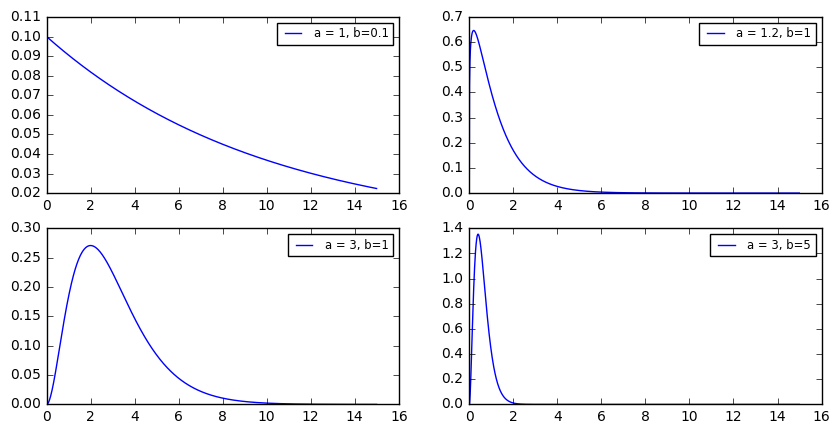

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import binom as binomial
from scipy.special import gamma
%matplotlib inline

gammass = lambda a, b: lambda x: ((b**a)/gamma(a)) * (x **(a-1)) * (np.exp(-b*x))
X = np.arange(0,15,0.01)
a = [1,1.2, 3,3]
b = [0.1,1,1,5]


ziped = zip(a,b)

fig, ax = plt.subplots(2,2,figsize=(10,5))
ax = ax.reshape(4,)
ziped2 = zip(ax,ziped)

print ziped
for e in ziped2:
    e[0].plot(X,gammass(*e[1])(X), label = 'a = {0}, b={1}'.format(*e[1]))
    e[0].legend(loc = 'best', fontsize = 'small')
    



### Observations of model's hyperparameters:
* When alpha is one or smaller, the line has an asymptotic.
* Once alpha is greater than one, the line becomes unimodal.
* Beta controls the height of the curve when alpha is great than one.
* The value of beta has an inverse relationship with the variance. If beta is large, the variance is small because the unimodal distribution is more peaked.

**Exercise 2:**

The data points that you collected are in the below list denoted by waiting_time. Each of the tuples in the list represents an intervall of time that you measured. You can now use the below data points to calculate the probability of the measured intervalls as a function of $(\beta, \alpha)$

$$(\beta, \alpha) \to P_{(\beta, \alpha)}( W_1 \in [3.8,4.2), W_2 \in [3.5, 4.5), W_3 \in [4.1, 5.9), ...)$$

Create a lambda expression that maps every pair $(\beta, \alpha)$ onto the probability and craete a 3D plot. 

In [7]:
waiting_time =[(4,0.2),(4,0.5), (5,0.9), (6,0.2), (4,0.2), (6,0.2), (5,0.6), (15,0.6)]
alpha_beta = [(x-y, x+y) for x,y in waiting_time]
alpha_beta



[(3.8, 4.2),
 (3.5, 4.5),
 (4.1, 5.9),
 (5.8, 6.2),
 (3.8, 4.2),
 (5.8, 6.2),
 (4.4, 5.6),
 (14.4, 15.6)]

**Gamma Distribution**

The Gamma distribution is defined by
$$d\Gamma_{(\beta, \alpha)}(x) = \frac{\beta^{\alpha}}{\Gamma(\alpha)} x^{\alpha -1} e^{-\beta x}d\lambda_L(x) ,\, \beta >0, \alpha >0$$

A random Variable which is distributed with the Gamma Distribution only takes positive values. 
This distribution is often used to model waiting times.

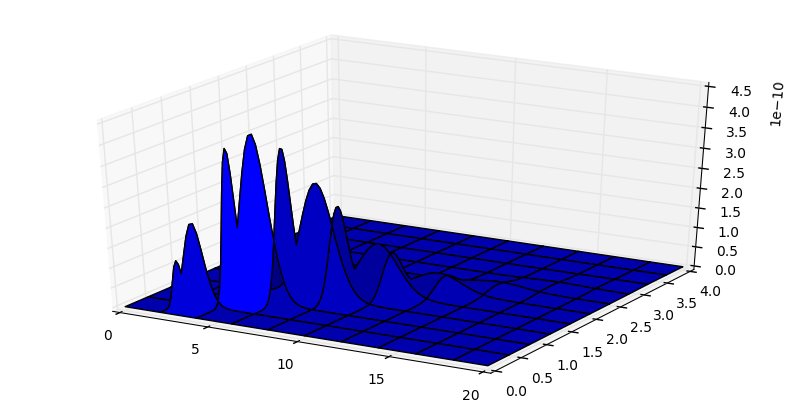

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import binom as binomial
from scipy.special import gamma
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline



gammad = lambda a, b: lambda x: ((b**a)/gamma(a)) * (x **(a-1)) * (np.exp(-b*x))

from mpl_toolkits.mplot3d import Axes3D

prod_prob = (lambda a,b: 
              integrate.quad(lambda x: gammad(a,b)(x), 3.8, 4.2)[0]
            * integrate.quad(lambda x: gammad(a,b)(x), 3.5, 4.5)[0] 
            * integrate.quad(lambda x: gammad(a,b)(x), 4.1, 5.9)[0]
            * integrate.quad(lambda x: gammad(a,b)(x), 5.8, 6.2)[0]
            * integrate.quad(lambda x: gammad(a,b)(x), 3.8, 4.2)[0]
            * integrate.quad(lambda x: gammad(a,b)(x), 5.8, 6.2)[0]
            * integrate.quad(lambda x: gammad(a,b)(x), 4.4, 5.6)[0]
            * integrate.quad(lambda x: gammad(a,b)(x), 14.4, 15.6)[0])



#a = np.linspace(0.01,20, 100)

a = np.linspace(0.01,20, 100)
b = np.linspace(0.01,4, 100)
a, b = np.meshgrid(a,b)
vector = np.vectorize(prod_prob)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1, projection = '3d')
ax1.plot_surface(a,b, vector(a,b))



### APPROACH:
Each point in the graph above represents a potential pair of hyperparaters which will govern the shape of our model's distribution. In order to pick the optimal distribution for our model, we determined the Maximum likelihood. 

[(0.01, 0.01)]


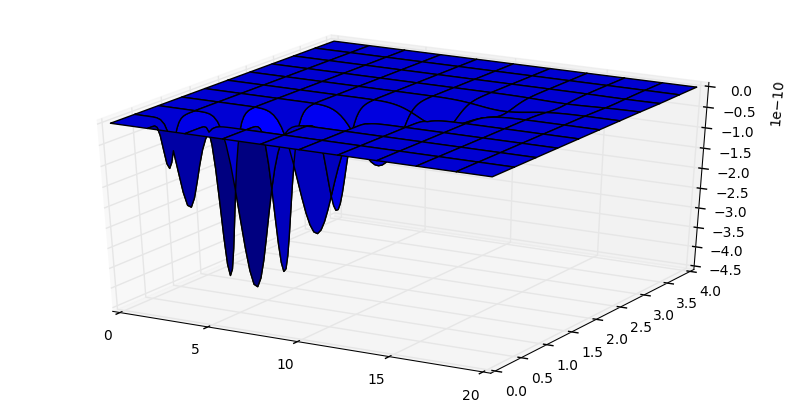

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import binom as binomial
from scipy.special import gamma
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline



gammad = lambda a, b: lambda x: ((b**a)/gamma(a)) * (x **(a-1)) * (np.exp(-b*x))

from mpl_toolkits.mplot3d import Axes3D

prod_prob = (lambda a,b: 
              integrate.quad(lambda x: gammad(a,b)(x), 3.8, 4.2)[0]
            * integrate.quad(lambda x: gammad(a,b)(x), 3.5, 4.5)[0] 
            * integrate.quad(lambda x: gammad(a,b)(x), 4.1, 5.9)[0]
            * integrate.quad(lambda x: gammad(a,b)(x), 5.8, 6.2)[0]
            * integrate.quad(lambda x: gammad(a,b)(x), 3.8, 4.2)[0]
            * integrate.quad(lambda x: gammad(a,b)(x), 5.8, 6.2)[0]
            * integrate.quad(lambda x: gammad(a,b)(x), 4.4, 5.6)[0]
            * integrate.quad(lambda x: gammad(a,b)(x), 14.4, 15.6)[0]
            * -1)



a = np.linspace(0.01,20, 100)
b = np.linspace(0.01,4, 100)

zipped = zip(a,b)
print zipped[0:1]
a,b = np.meshgrid(a,b)
vector = np.vectorize(prod_prob)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1, projection = '3d')
ax1.plot_surface(a,b, vector(a,b))



### Minima
Oddly, Python is not able to find the maxima, although it is able to find the minima. 
Hence, I inverted the 3-D space along the X plane. Using the Nelder-Mead method, I found the minima.
There is one caveat to useing this method. The starting point p0 will have greatly affect the outcome.
This approach will only find the relative, not absolute, minimia. 


In [13]:
from scipy.optimize import minimize

func = lambda z: prod_prob(z[0], z[1])

x0 = [5,1]
funxMin = minimize(func, x0, method = 'Nelder-Mead')
funxMin.x

array([ 4.95830573,  0.81042338])

## OBSERVATIONS

* The probabilities are very close to zero. Even with the maximum likelihood, the chances of 

* Oddly, Python is not able to find the maxima, although it is able to find the minima. Hence, I inverted the 3-D space along the X plane. Using the Nelder-Mead method, I found the minima. There is one caveat to useing this method. The starting point p0 will have greatly affect the outcome. This approach will only find the relative, not absolute, minimia.

* The probabilities are extremely small, close to zero, which means that the probability of our dataset given our model, is very small.

* In our set, the outlier is the 8th weighting time, (14.4, 15.6) and such a far deviation from the rest of the data points and will skew the moments.

* One solution: We can take in more data points.  Consequently the weight of each of the data points decreases and we can assume that more data points will bring the distribution closer to the real distribution.


#### Plotting the distribution of the maximum likelihood solution together with a normed histogram of the waiting times.

### EDA: 

Plotting the distribution of the maximum likelihood solution together with a normed histogram of the waiting times shows that the outlier has too much weight because the sample size is so small.

(array([ 0.41322314,  0.20661157,  0.10330579,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.10330579]),
 array([  3.5 ,   4.71,   5.92,   7.13,   8.34,   9.55,  10.76,  11.97,
         13.18,  14.39,  15.6 ]),
 <a list of 10 Patch objects>)

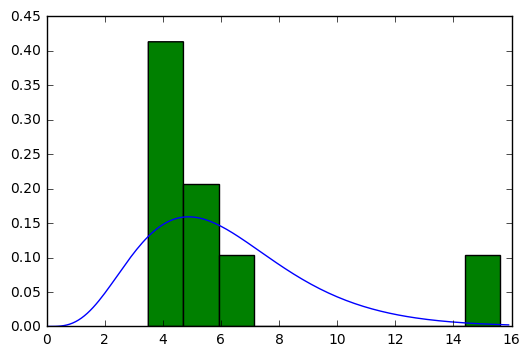

In [15]:
gammad = lambda x: ((0.81042338**4.95830573)/gamma(4.95830573)) * (x **(4.95830573-1)) * (np.exp(-0.81042338*x))
x = np.arange(0,16,.1)
plt.plot(x, gammad(x))

wt = [3.8, 4.2,3.5, 4.5, 4.1, 5.9,5.8, 6.2,3.8, 4.2,5.8, 6.2,4.4, 5.6,14.4, 15.6]

#numpy.histogram(a, bins=10, range=None, normed=False, weights=None, density=None)[source]

plt.hist(wt, normed=True)




### First and Second Moments

Here we calculated the mean and variance of the maximum likelihood distribution using integration. 


In [16]:
from scipy import integrate

gammad = lambda x: ((0.81042338**4.95830573)/gamma(4.95830573)) * (x **(4.95830573-1)) * (np.exp(-0.81042338*x))

#mean was calculated by integral
evwt = integrate.quad(lambda x: gammad(x) * x, 0, np.infty)
print evwt[0]

evwt2 = integrate.quad(lambda x: gammad(x) * (x**2), 0, np.infty)
varwt = evwt2[0] - evwt[0]**2
print varwt

#definition in terms of gamma distributions
gamma_mean =4.95830573/0.81042338
print "this is the mean- " + str(gamma_mean)

gamma_var =4.95830573/(0.81042338**2)
print "this is the mean- " + str(gamma_var)

#shows that integral will give same mean as mean and variance according to gamma distribution formula.




6.11816718565
7.54934684344
this is the mean- 6.11816718565
this is the mean- 7.54934684344


The waiting time with the highest probability is [ 4.88427734]


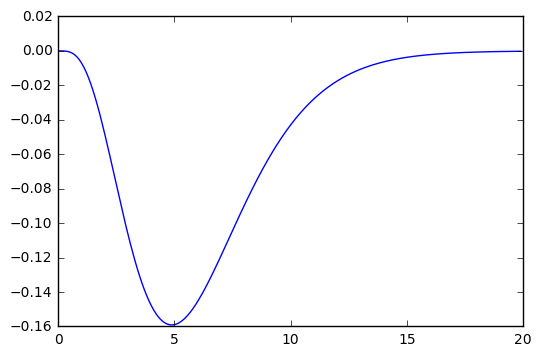

In [17]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import binom as binomial
from scipy.special import gamma
%matplotlib inline
from scipy.optimize import minimize


gammad = lambda x: ((0.81042338**4.95830573)/gamma(4.95830573)) * (x **(4.95830573-1)) * (np.exp(-0.81042338*x) * (-1))
x = np.arange(0,20,.1)
plt.plot(x, gammad(x))

func12 = lambda z: gammad(z)
x0 = [4]
funxMin = minimize(func12, x0, method = 'Nelder-Mead')
print "The waiting time with the highest probability is " + str(funxMin.x)


